In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib widget

El módulo Maplotlib.animation contiene ayudantes importantes para crear animaciones, y para nuestra discusión de hoy, el objeto importante que vamos a usar se llama **FuncAnimation**. Esto crea una animación llamando iterativamente a una función que defina. El trabajo de esta función es borrar el objeto del eje y volver a dibujar el siguiente cuadro de la animación. Luego, estos cuadros se apilan juntos en un video reproducible.

In [2]:
# Vamos a crear unos datos aleatorios
n = 100
x = np.random.randn()

Bien, ahora queremos **crear una función que haga el trazado**. Llamaremos a esta función actualización. Ahora el objeto Matplotlib FuncAnimation lo llamará cada pocos milisegundos y pasará el número de cuadro en el que estamos comenzando con el cuadro cero. Así que podemos usar esto como el índice de los valores de nuestra matriz, a los que llamamos x.

Lo primero que queremos hacer es ver si el marco actual está al final de nuestra lista. Si es así, debemos decirle a la animación que se detenga. Hacemos esto llamando al objeto de parada en el objeto de origen del evento adjunto al objeto FuncAnimation.

In [6]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    
    # What is a? Well, it's an object that we'll define in a bit, and it will
    # sit outside of this function but we can still access it since python allows
    # us to access variables in the global scope.
    
    # Now on to the work. First thing we want to do is clear the current axes.
    # We can do this with plt.cla().
    plt.cla()
    
    # Now I jut want to plot a histogram. I'm going to set my bins to a predictable
    # value so it doesn't jump around, but you can play with this
    bins = np.arange(-4, 4, 0.5)
    
    # Then we just make the hist() using the current frame number which was passed
    # into the function and our global values array
    plt.hist(x[:curr], bins=bins)
    
    # Set the axes limits
    plt.axis([-4,4,0,30])
    
    # And add some nice labels throughout
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

Ahora la mayor parte de nuestro trabajo duro está hecho, así que solo tenemos que verlo. Para hacer esto, solo generamos una nueva figura, luego llamamos al constructor FuncAnimation y la asignamos a la variable a, ya que la necesitamos para nuestra función update() que detendrá la animación al final. El primer parámetro es la figura con la que estamos trabajando.

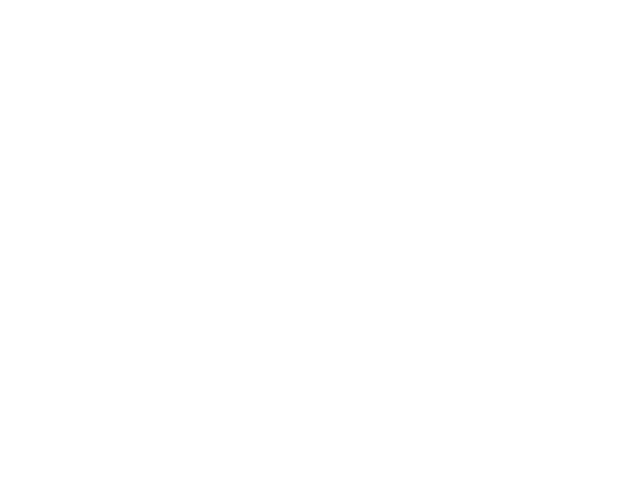

In [7]:
# Quick to start
a = animation.FuncAnimation(plt.figure(), update, interval=100)

# Now tell the widget back end it's time to show!
plt.show()